In [1]:
%pylab inline
from scipy.interpolate import interp1d

Populating the interactive namespace from numpy and matplotlib


In [2]:
mass_ = array([500,400,300,200,120,100,80,70,60,50,40,30,25,20,15,12,9]) 
age_ = array([1.89, 1.97, 2.07, 2.24, 2.55, 2.70, 2.93, 3.10, 3.33, 3.67, 4.21, 5.20, 6.07, 7.53, 10.37, 13.81, 21.04])

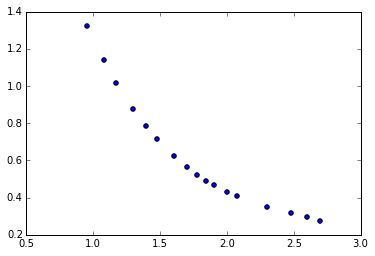

In [5]:
scatter(log10(mass_), log10(age_))

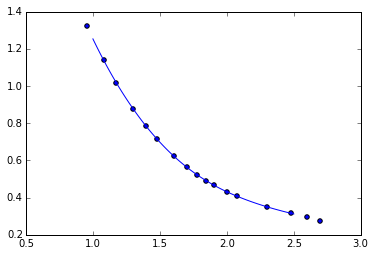

In [6]:
fage = interp1d(log10(mass_), log10(age_), kind='cubic')
scatter(log10(mass_), log10(age_))
x = linspace(1.0,2.5,100)
plot(x, fage(x))

In [7]:
alpha = 2.35
m_min = 9.0
m_max = 50.0
m_min = 4.0
print m_min, m_max

def cumulative_pdf(x):
    norm_pdf_ = (1.0-alpha) / (m_max**(1.0-alpha) - m_min**(1.0-alpha))
    cpdf = norm_pdf_ * (x**(1.0-alpha) - m_min**(1.0-alpha))/(1.0-alpha)
    return cpdf

def inverse_cumulative_pdf(x):
    norm_pdf_ = (1.0-alpha) / (m_max**(1.0-alpha) - m_min**(1.0-alpha))
    invcpdf = ( x * (1.0-alpha)/norm_pdf_ + m_min**(1.0-alpha))**(1.0/(1.0-alpha))
    return invcpdf

4.0 50.0


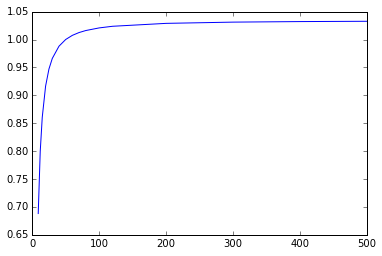

In [8]:
plot(mass_, cumulative_pdf(mass_))


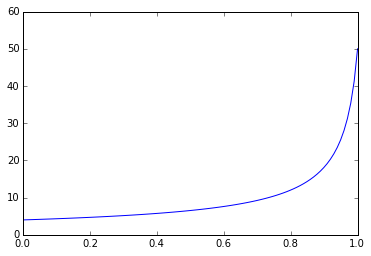

In [9]:
x=linspace(0.0,1.0,100)
plot(x, inverse_cumulative_pdf(x))

In [10]:
solar_mass_batch  = 1000
n_stream = 100000
stream_mass = inverse_cumulative_pdf(random.random(n_stream))

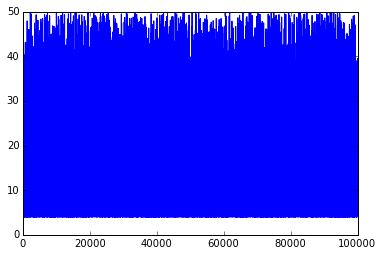

In [11]:
plot(stream_mass)

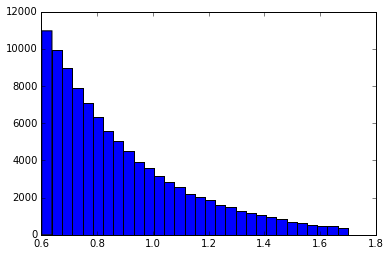

In [12]:
a = hist(log10(stream_mass), bins=30)

In [13]:
tmp_ = stream_mass.cumsum()

batch_id = -ones(n_stream, dtype=int)
n_batches = int(stream_mass.cumsum()[-1]/solar_mass_batch)
min_id = 0
for i in range(n_batches):
    #print tmp_[min_id]
    if(min_id==0):
        max_id = where( ((tmp_) > 0) & (( tmp_) < solar_mass_batch))
    else:
        max_id = where( ((tmp_- tmp_[min_id-1]) > 0) & (( tmp_- tmp_[min_id-1]) < solar_mass_batch))  
    max_id = max_id[0][-1]
    #print min_id, max_id
    batch_id[min_id:max_id+1] = i
    min_id = max_id+1

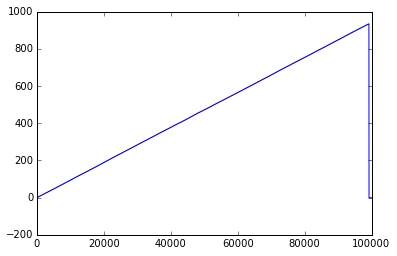

In [14]:
plot(batch_id)

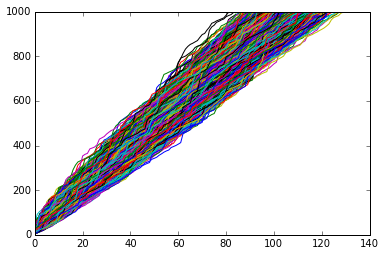

In [15]:
for i in range(n_batches):
    plot(stream_mass[batch_id==i].cumsum())
    #print(stream_mass[batch_id==i].sum(), len(stream_mass[batch_id==i]))
    #print sort(stream_mass[batch_id==i])

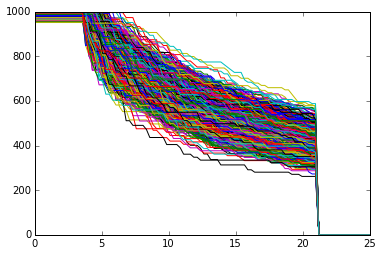

In [39]:
for k in arange(n_batches):
    batch_mass = sort(stream_mass[batch_id==k])[::-1]
#print mass_.min()
    tmp_batch_mass = batch_mass.copy()
    tmp_batch_mass[batch_mass<mass_.min()] = mass_.min() 
    batch_age = 10**fage(log10(tmp_batch_mass))

    time = linspace(0.0,25.0, 100)
    mass = zeros(100)
    for i in arange(100):
        mass[i] = sum(batch_mass[batch_age>time[i]])
    plot(time, mass)